In [10]:
import pyscreenshot as ImageGrab
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

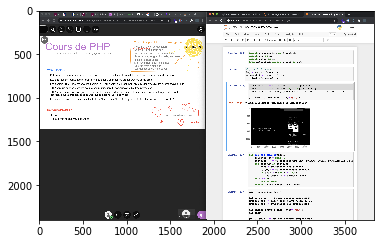

In [141]:
# grab fullscreen
img = ImageGrab.grab()
screenshot = np.array(img)
plt.imshow(screenshot)

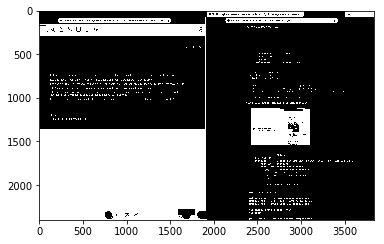

In [142]:
black_color_1 = np.array([0,0,0], np.uint8)
black_color_2 = np.array([45,45,45], np.uint8)
black_mask = cv.inRange(screenshot, black_color_1, black_color_2)

plt.imshow(black_mask, cmap='gray')

In [143]:
def get_max_contour(img):
    selected, m = None, 0
    contours, _ = cv.findContours(img, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)
    for contour in contours:
        area = cv.contourArea(contour)
        _,_,w,h = cv.boundingRect(contour)
        if area > m and h < 2000:
            selected, m = contour, area
    if m == 0:
        return None
    return cv.boundingRect(selected)

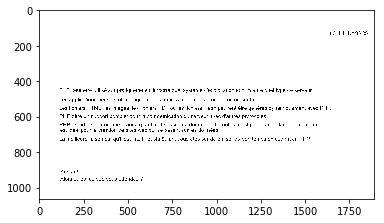

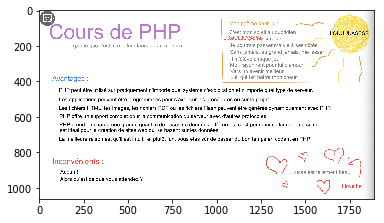

In [144]:
img = screenshot.copy()

(x1,y1,w1,h1) = get_max_contour(black_mask)
cropped_mask = black_mask[y1:y1+h1,x1:x1+w1]
cropped_mask = cv.bitwise_not(cropped_mask)

plt.imshow(cropped_mask, cmap='gray')
plt.show()

(x2,y2,w2,h2) = get_max_contour(cropped_mask)

img = screenshot[y1+y2:y1+y2+h2, x1+x2:x1+x2+w2]
plt.imshow(img)